Iteration 1/30 | Best Fitness: 0.9843
Iteration 2/30 | Best Fitness: 0.9843
Iteration 3/30 | Best Fitness: 0.9843
Iteration 4/30 | Best Fitness: 0.9843
Iteration 5/30 | Best Fitness: 0.9843
Iteration 6/30 | Best Fitness: 0.9843
Iteration 7/30 | Best Fitness: 0.9843
Iteration 8/30 | Best Fitness: 0.9843
Iteration 9/30 | Best Fitness: 0.9843
Iteration 10/30 | Best Fitness: 0.9843
Iteration 11/30 | Best Fitness: 0.9843
Iteration 12/30 | Best Fitness: 0.9843
Iteration 13/30 | Best Fitness: 0.9843
Iteration 14/30 | Best Fitness: 0.9843
Iteration 15/30 | Best Fitness: 0.9843
Iteration 16/30 | Best Fitness: 0.9843
Iteration 17/30 | Best Fitness: 0.9843
Iteration 18/30 | Best Fitness: 0.9843
Iteration 19/30 | Best Fitness: 0.9843
Iteration 20/30 | Best Fitness: 0.9843
Iteration 21/30 | Best Fitness: 0.9843
Iteration 22/30 | Best Fitness: 0.9843
Iteration 23/30 | Best Fitness: 0.9843
Iteration 24/30 | Best Fitness: 0.9843
Iteration 25/30 | Best Fitness: 0.9843
Iteration 26/30 | Best Fitness: 0.

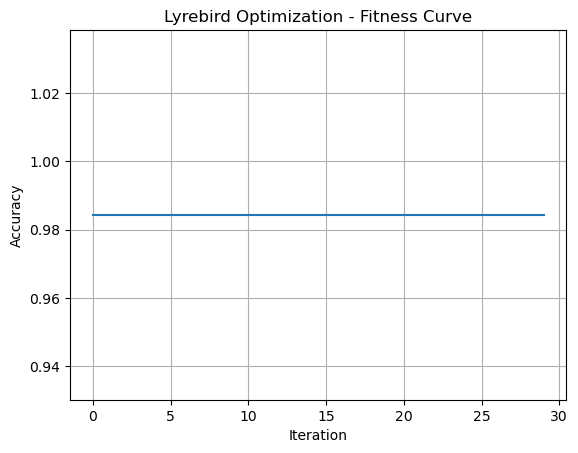

Selected features: [ 0  2  4  5  8 11 12 14 16 21 23 24 28 29 31 35 36 37 38]

--- SVM WITH FEATURE SELECTION ---
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       388
           1       0.00      0.00      0.00        10

    accuracy                           0.97       398
   macro avg       0.49      0.50      0.49       398
weighted avg       0.95      0.97      0.96       398

Accuracy: 0.9748743718592965
AUC: 0.7561855670103093


c:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


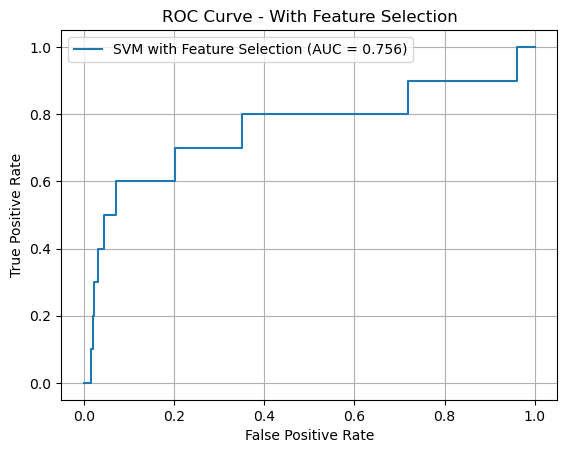


--- SVM WITHOUT FEATURE SELECTION ---
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       388
           1       0.00      0.00      0.00        10

    accuracy                           0.97       398
   macro avg       0.49      0.50      0.49       398
weighted avg       0.95      0.97      0.96       398

Accuracy: 0.9748743718592965
AUC: 0.7234536082474227


c:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


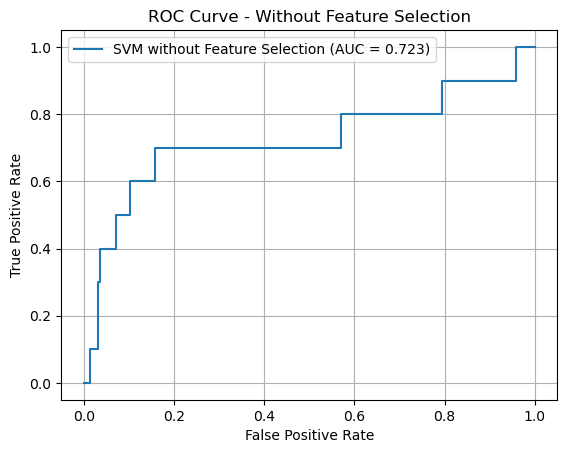

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

# --------------------------- Load Dataset ---------------------------
# Replace this path with your local dataset location
data = pd.read_csv(r"C:\Users\KIIT\OneDrive\Desktop\project\mc1_csv.csv")

# Convert target labels to integer encoded classes and ensure they are 1D integer array
y = data.iloc[:, -1].values
# If labels are not integer dtype, try converting to int (covers numeric strings), otherwise use LabelEncoder
if not np.issubdtype(y.dtype, np.integer):
    try:
        y = y.astype(int)
    except Exception:
        y = LabelEncoder().fit_transform(y)
y = np.ravel(y)  # ensure 1D
X = data.iloc[:, :-1].values

# --------------------------- Train-test split and scaling ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --------------------------- Lyrebird Optimization Algorithm (LOA) ---------------------------
def LOA_feature_selection(X, y, num_agents=10, max_iter=30):
    n_features = X.shape[1]
    positions = np.random.randint(0, 2, (num_agents, n_features))
    best_agent = None
    best_fitness = -np.inf
    fitness_curve = []

    def fitness(agent):
        if np.sum(agent) == 0:
            return 0
        selected = np.where(agent == 1)[0]
        X_sel = X[:, selected]
        X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_sel, y, test_size=0.2, random_state=42)
        model = SVC(kernel='rbf', probability=True)
        model.fit(X_train_fs, y_train_fs)
        y_pred = model.predict(X_test_fs)
        return accuracy_score(y_test_fs, y_pred)

    for t in range(max_iter):
        for i in range(num_agents):
            fit = fitness(positions[i])
            if fit > best_fitness:
                best_fitness = fit
                best_agent = positions[i].copy()

        # Update positions (LOA mechanism)
        for i in range(num_agents):
            for j in range(n_features):
                if np.random.rand() < 0.3:
                    positions[i][j] = 1 - positions[i][j]  # bit flip

        fitness_curve.append(best_fitness)
        print(f"Iteration {t+1}/{max_iter} | Best Fitness: {best_fitness:.4f}")

    plt.plot(fitness_curve)
    plt.title("Lyrebird Optimization - Fitness Curve")
    plt.xlabel("Iteration")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.show()

    selected_features = np.where(best_agent == 1)[0]
    print("Selected features:", selected_features)
    return selected_features

# --------------------------- SVM With Feature Selection ---------------------------
selected_features = LOA_feature_selection(X_train, y_train)
X_train_fs = X_train[:, selected_features]
X_test_fs = X_test[:, selected_features]

svm_fs = SVC(kernel='rbf', probability=True)
svm_fs.fit(X_train_fs, y_train)
y_pred_fs = svm_fs.predict(X_test_fs)
y_prob_fs = svm_fs.predict_proba(X_test_fs)[:, 1]

print("\n--- SVM WITH FEATURE SELECTION ---")
print(classification_report(y_test, y_pred_fs))
print("Accuracy:", accuracy_score(y_test, y_pred_fs))
print("AUC:", roc_auc_score(y_test, y_prob_fs))

fpr, tpr, _ = roc_curve(y_test, y_prob_fs, pos_label=1)
plt.plot(fpr, tpr, label=f'SVM with Feature Selection (AUC = {roc_auc_score(y_test, y_prob_fs):.3f})')
plt.title("ROC Curve - With Feature Selection")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# --------------------------- SVM Without Feature Selection ---------------------------
svm_nofs = SVC(kernel='rbf', probability=True)
svm_nofs.fit(X_train, y_train)
y_pred_nofs = svm_nofs.predict(X_test)
y_prob_nofs = svm_nofs.predict_proba(X_test)[:, 1]

print("\n--- SVM WITHOUT FEATURE SELECTION ---")
print(classification_report(y_test, y_pred_nofs))
print("Accuracy:", accuracy_score(y_test, y_pred_nofs))
print("AUC:", roc_auc_score(y_test, y_prob_nofs))

fpr, tpr, _ = roc_curve(y_test, y_prob_nofs, pos_label=1)
plt.plot(fpr, tpr, label=f'SVM without Feature Selection (AUC = {roc_auc_score(y_test, y_prob_nofs):.3f})')
plt.title("ROC Curve - Without Feature Selection")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()
